In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv('./nfl_sentiments.csv')
df.head(10)

,username,timestamp,text,team,sentiment,confidence,roberta_raw_outputs,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Gary,2024-11-29T23:30:57.000Z,I'm calling it right now. The Cleveland Browns...,Cleveland Browns,positive,0.761263251304627,"[0.11510010063648224, 0.1236366480588913, 0.76...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HireSamCassell,2024-11-29T23:30:57.000Z,That's a Cleveland Browns type way to lose a g...,Cleveland Browns,negative,0.69503664970398,"[0.6950366497039795, 0.173924520611763, 0.1310...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Smart Life Trending,2024-11-29T23:30:57.000Z,These Are the Coolest Gifts on Everyone's Wish...,Cleveland Browns,positive,0.770186603069305,"[0.11205105483531952, 0.11776237189769745, 0.7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,QWIKET NFL,2024-11-29T23:30:57.000Z,#nfl #Browns The upcoming game between the Cle...,Cleveland Browns,positive,0.512993693351746,"[0.15344911813735962, 0.3335571587085724, 0.51...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Scott Petrak ct,2024-11-29T23:30:57.000Z,#Browns WR Jerry Jeudy discusses wanting out o...,Cleveland Browns,negative,0.811408400535584,"[0.8114084005355835, 0.22446484863758087, 0.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TMS Sports host ☭,2024-11-29T23:30:57.000Z,Has to be the Giants. A once renowned franchis...,Cleveland Browns,neutral,0.450621992349625,"[0.35996171832084656, 0.45062199234962463, 0.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Chris Tomasson,2024-11-29T20:16:01.000Z,Browns receiver Jerry Jeudy talked more today ...,Cleveland Browns,neutral,0.729099094867706,"[0.12347245216369629, 0.7290990948677063, 0.14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Spectrum News 1 OH,2024-11-29T20:16:01.000Z,The Pittsburgh Steelers had stacked up five st...,Cleveland Browns,neutral,0.696900963783264,"[0.13515977561473846, 0.6969009637832642, 0.16...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Nate Binford,2024-11-29T20:16:01.000Z,Using the Playoff Machine if we win out that m...,Cleveland Browns,negative,0.978627145290375,"[0.9786271452903748, 0.047873836010694504, 0.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,the cleveland browns are too progressive,2024-11-29T20:16:01.000Z,OU’s booth today has said close to zero names ...,Cleveland Browns,negative,0.442694842815399,"[0.44269484281539917, 0.3869922459125519, 0.17...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   username             5171 non-null   object 
 1   timestamp            5170 non-null   object 
 2   text                 5171 non-null   object 
 3   team                 5170 non-null   object 
 4   sentiment            5170 non-null   object 
 5   confidence           5171 non-null   object 
 6   roberta_raw_outputs  5171 non-null   object 
 7   Unnamed: 7           18 non-null     object 
 8   Unnamed: 8           4 non-null      object 
 9   Unnamed: 9           1 non-null      object 
 10  Unnamed: 10          1 non-null      object 
 11  Unnamed: 11          1 non-null      object 
 12  Unnamed: 12          1 non-null      object 
 13  Unnamed: 13          1 non-null      object 
 14  Unnamed: 14          1 non-null      float64
 15  Unnamed: 15          1 non-null      o

In [129]:
df["timestamp"] = pd.to_datetime(
    df["timestamp"], 
    format="%Y-%m-%dT%H:%M:%S.%fZ",  # Explicit format for efficiency
    utc=True  # Ensure UTC timezone awareness
)

In [130]:
# find earliest tweet and latest tweet
earliest_tweet = df['timestamp'].min()
latest_tweet = df['timestamp'].max()
print(f"Earliest tweet: {earliest_tweet}")
print(f"Latest tweet: {latest_tweet}")

Earliest tweet: 2024-11-23 00:03:46+00:00
Latest tweet: 2024-12-17 23:59:51+00:00


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   username             5171 non-null   object             
 1   timestamp            5170 non-null   datetime64[ns, UTC]
 2   text                 5171 non-null   object             
 3   team                 5170 non-null   object             
 4   sentiment            5170 non-null   object             
 5   confidence           5171 non-null   object             
 6   roberta_raw_outputs  5171 non-null   object             
 7   Unnamed: 7           18 non-null     object             
 8   Unnamed: 8           4 non-null      object             
 9   Unnamed: 9           1 non-null      object             
 10  Unnamed: 10          1 non-null      object             
 11  Unnamed: 11          1 non-null      object             
 12  Unnamed: 12         

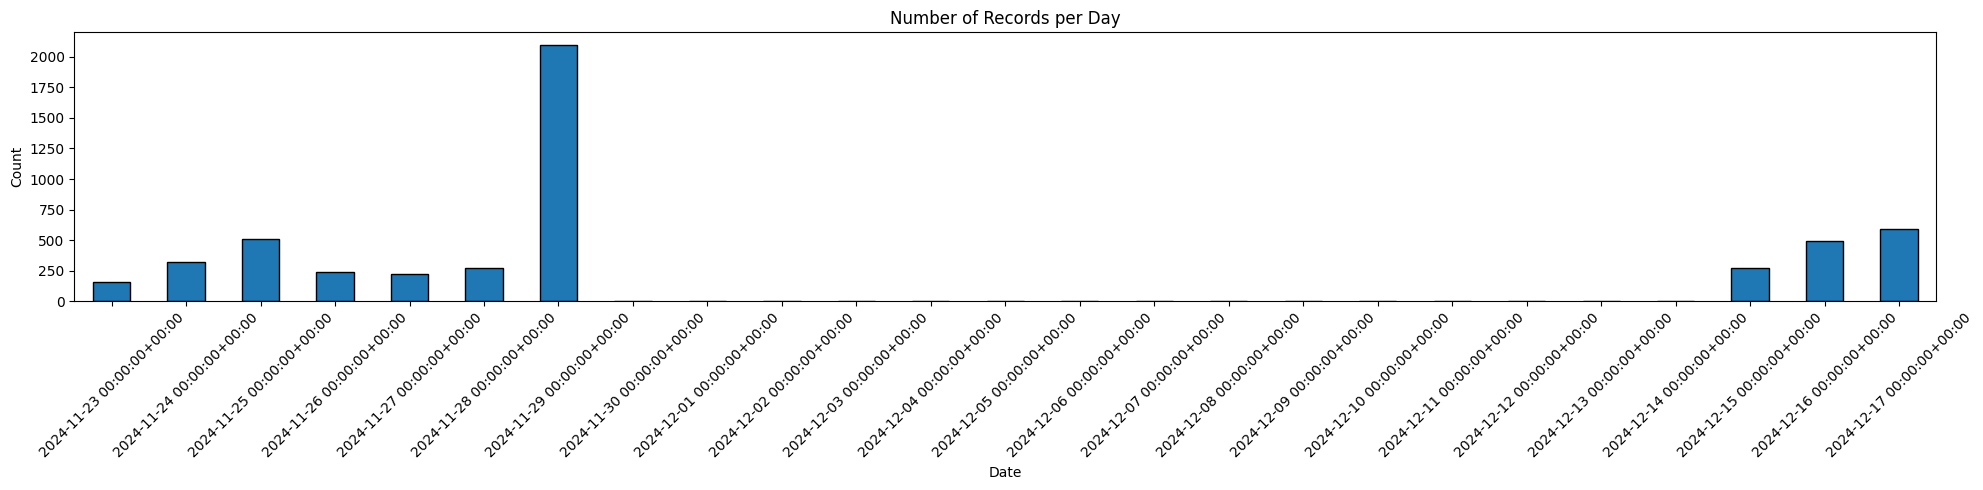

In [132]:
# histogram of tweets over time
daily_counts = df.resample('D', on='timestamp').size()

daily_counts.plot(
    kind='bar',
    figsize=(20, 5),
    title='Number of Records per Day',
    xlabel='Date',
    ylabel='Count',
    edgecolor='black'
)

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [133]:
start = pd.Timestamp('2024-11-29', tz='UTC')
end = pd.Timestamp('2024-11-30', tz='UTC')
filtered_df = df[(df['timestamp'] >= start) & (df['timestamp'] <= end)]

earliest_tweet = filtered_df['timestamp'].min()
latest_tweet = filtered_df['timestamp'].max()
print(earliest_tweet, latest_tweet)

2024-11-29 00:02:21+00:00 2024-11-29 23:59:48+00:00


In [134]:
filtered_df['team'].value_counts()

team
Miami Dolphins                                                                                                                                                                                778
Kansas City Chiefs                                                                                                                                                                            593
Detroit Lions                                                                                                                                                                                 448
Cleveland Browns                                                                                                                                                                               86
Denver Broncos                                                                                                                                                                                 69
New York Jets            

In [135]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2096 entries, 0 to 3673
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   username             2096 non-null   object             
 1   timestamp            2096 non-null   datetime64[ns, UTC]
 2   text                 2096 non-null   object             
 3   team                 2095 non-null   object             
 4   sentiment            2096 non-null   object             
 5   confidence           2096 non-null   object             
 6   roberta_raw_outputs  2096 non-null   object             
 7   Unnamed: 7           11 non-null     object             
 8   Unnamed: 8           2 non-null      object             
 9   Unnamed: 9           1 non-null      object             
 10  Unnamed: 10          1 non-null      object             
 11  Unnamed: 11          1 non-null      object             
 12  Unnamed: 12          1 no

In [136]:
games = [({"Detroit Lions", "Chicago Bears"}, pd.Timestamp('2024-11-28 17:30:00', tz='UTC'), "Detroit Lions"),
         ({"Dallas Cowboys", "New York Giants"}, pd.Timestamp('2024-11-28 21:30:00', tz='UTC'), "Dallas Cowboys"),
         ({"Miami Dolphins", "Green Bay Packers"}, pd.Timestamp('2024-11-29 01:20:00', tz='UTC'), "Green Bay Packers"),
         ({"Las Vegas Raiders", "Kansas City Chiefs"}, pd.Timestamp('2024-11-29 20:20:00', tz='UTC'), "Las Vegas Raiders"),
         ({"Los Angeles Chargers", "Atlanta Falcons"}, pd.Timestamp('2024-12-01 18:00:00', tz='UTC'), "Los Angeles Chargers"),
         ({"Pittsburgh Steelers", "Cincinnati Bengals"}, pd.Timestamp('2024-12-01 18:00:00', tz='UTC'), "Pittsburgh Steelers"),
         ({"Arizona Cardinals", "Minnesota Vikings"}, pd.Timestamp('2024-12-01 18:00:00', tz='UTC'), "Minnesota Vikings"),
         ({"Indianapolis Colts", "New England Patriots"}, pd.Timestamp('2024-12-01 18:00:00', tz='UTC'), "Indianapolis Colts"),
         ({"Seattle Seahawks", "New York Jets"}, pd.Timestamp('2024-12-01 18:00:00', tz='UTC'), "Seattle Seahawks"),
         ({"Tennessee Titans", "Washington Commanders"}, pd.Timestamp('2024-12-01 18:00:00', tz='UTC'), "Washington Commanders"),
         ({"Houston Texans", "Jacksonville Jaguars"}, pd.Timestamp('2024-12-01 18:00:00', tz='UTC'), "Houston Texans"),
         ({"Los Angeles Rams", "New Orleans Saints"}, pd.Timestamp('2024-12-01 21:05:00', tz='UTC'), "Los Angeles Rams"),
         ({"Tampa Bay Buccaneers", "Carolina Panthers"}, pd.Timestamp('2024-12-01 21:05:00', tz='UTC'), "Tampa Bay Buccaneers"),
         ({"Philadelphia Eagles", "Baltimore Ravens"}, pd.Timestamp('2024-12-01 21:25:00', tz='UTC'), "Philadelphia Eagles"),
         ({"San Francisco 49ers", "Buffalo Bills"}, pd.Timestamp('2024-12-02 01:20:00', tz='UTC'), "Buffalo Bills"),
         ({"Cleveland Browns", "Denver Broncos"}, pd.Timestamp('2024-12-03 01:15:00', tz='UTC'), "Denver Broncos"),]

# Dictionary to store new DataFrame rows
new_df_dict = {}

# Loop through DataFrame rows
for i, row in df.iterrows():
    for game in games:
        # Check if row's team is in game and timestamp within range
        if row['team'] in game[0] and game[1] - pd.Timedelta(days=3) <= row['timestamp'] <= game[1] + pd.Timedelta(days=3):
            new_row = row.copy()  # Ensure modification doesn't affect original DataFrame
            new_row['winner'] = 1 if row['team'] == game[2] else 0
            new_df_dict[i] = new_row
            break  # Stop checking once a match is found

# Convert dictionary to DataFrame
new_df = pd.DataFrame.from_dict(new_df_dict, orient='index')

# Check resulting DataFrame
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 441 to 3683
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   username             2026 non-null   object             
 1   timestamp            2026 non-null   datetime64[ns, UTC]
 2   text                 2026 non-null   object             
 3   team                 2026 non-null   object             
 4   sentiment            2026 non-null   object             
 5   confidence           2026 non-null   object             
 6   roberta_raw_outputs  2026 non-null   object             
 7   Unnamed: 7           0 non-null      float64            
 8   Unnamed: 8           0 non-null      float64            
 9   Unnamed: 9           0 non-null      float64            
 10  Unnamed: 10          0 non-null      float64            
 11  Unnamed: 11          0 non-null      float64            
 12  Unnamed: 12          0 

In [137]:
new_df['team'].value_counts()

team
Miami Dolphins          778
Kansas City Chiefs      593
Detroit Lions           518
New York Jets            63
Jacksonville Jaguars     42
Indianapolis Colts       32
Name: count, dtype: int64

In [138]:
new_df.head(10)

,username,timestamp,text,team,sentiment,confidence,roberta_raw_outputs,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,winner
441,Rick Ferguson,2024-11-29 23:15:29+00:00,The New England #Patriots are facing a number ...,Indianapolis Colts,neutral,0.640295088291168,"[0.21493594348430634, 0.6402950882911682, 0.14...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
442,QWIKET NFL,2024-11-29 23:15:29+00:00,#nfl #ForeverNE The Indianapolis Colts are fac...,Indianapolis Colts,negative,0.958470344543457,"[0.958470344543457, 0.06124580278992653, 0.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
443,traitly.me,2024-11-29 23:15:29+00:00,Are you normal? Learn your personality type now!,Indianapolis Colts,neutral,0.587424755096436,"[0.23482343554496765, 0.5874247550964355, 0.17...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
444,Indy Sports Nation,2024-11-29 23:15:29+00:00,Tune in live for #IndySportsNation with !!! #F...,Indianapolis Colts,neutral,0.545975565910339,"[0.15446239709854126, 0.5459755659103394, 0.29...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
445,Indy Sports Nation,2024-11-29 23:15:29+00:00,Tune in live for #IndySportsNation with ! #For...,Indianapolis Colts,neutral,0.614382028579712,"[0.14612558484077454, 0.6143820285797119, 0.23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
446,San Francisco 49ers Briefly,2024-11-29 23:15:29+00:00,Examining the roster ties between Patriots Col...,Indianapolis Colts,neutral,0.756399750709534,"[0.1162244975566864, 0.7563997507095337, 0.127...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
447,11 bit studios,2024-11-29 23:15:29+00:00,The frost won’t wait and neither should you – ...,Indianapolis Colts,positive,0.790389358997345,"[0.07543384283781052, 0.13417677581310272, 0.7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
448,93 WIBC Indianapolis,2024-11-29 23:15:29+00:00,SPORTS: Indianapolis Colts Head Coach Rules Ou...,Indianapolis Colts,negative,0.845641314983368,"[0.8456413149833679, 0.1864653378725052, 0.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
449,Peak Performance Sports,2024-11-29 23:15:29+00:00,“[Being benched] just allowed me to clean up s...,Indianapolis Colts,positive,0.373723089694977,"[0.2599512040615082, 0.3663257360458374, 0.373...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
450,Travis Reese,2024-11-29 23:15:29+00:00,On This Date in NFL History 4yrs ago:The Titan...,Indianapolis Colts,positive,0.505194783210754,"[0.1544022560119629, 0.3404029607772827, 0.505...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [139]:
from collections import defaultdict

team_to_summed_sentiment = defaultdict(int)
team_to_count = defaultdict(int)
team_won = {}

# loop through ever row in the new_df
for index, row in new_df.iterrows():
    team = row['team']
    sentiment = row['sentiment']
    confidence = float(row['confidence'])
    if sentiment == 'neutral':
        confidence *= 0
    elif sentiment == 'positive':
        confidence *= 1
    else:
        confidence *= -1
    team_to_summed_sentiment[team] += confidence
    team_to_count[team] += 1
    team_won[team] = 1 if row['winner'] == 1 else 0

team_to_average_sentiment = {team: team_to_summed_sentiment[team] / team_to_count[team] for team in team_to_summed_sentiment}

agg_df_dict = defaultdict(list)

for team in team_to_average_sentiment:
    agg_df_dict['team'].append(team)
    agg_df_dict['average_sentiment'].append(team_to_average_sentiment[team])
    agg_df_dict['won'].append(team_won[team])

print(agg_df_dict)

agg_df = pd.DataFrame(agg_df_dict)
agg_df.head(10)

defaultdict(<class 'list'>, {'team': ['Indianapolis Colts', 'New York Jets', 'Miami Dolphins', 'Detroit Lions', 'Kansas City Chiefs', 'Jacksonville Jaguars'], 'average_sentiment': [0.09152402915060519, -0.04739772658499464, -0.2699847482623662, -0.0783101820232325, -0.1253630037452479, -0.29008032097702935], 'won': [1, 0, 0, 1, 0, 0]})


,team,average_sentiment,won
0,Indianapolis Colts,0.091524,1
1,New York Jets,-0.047398,0
2,Miami Dolphins,-0.269985,0
3,Detroit Lions,-0.078310,1
4,Kansas City Chiefs,-0.125363,0
5,Jacksonville Jaguars,-0.290080,0


In [141]:
import statsmodels.api as sm

# Run logistic regression
X = sm.add_constant(agg_df["average_sentiment"])
y = agg_df["won"]
model = sm.Logit(y, X)
result = model.fit()

# Print p-value for Avg_Sentiment
print("\nP-value for Avg_Sentiment:", result.pvalues["average_sentiment"])
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.334135
         Iterations 8

P-value for Avg_Sentiment: 0.31187125261056503
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                    6
Model:                          Logit   Df Residuals:                        4
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                  0.4751
Time:                        10:46:27   Log-Likelihood:                -2.0048
converged:                       True   LL-Null:                       -3.8191
Covariance Type:            nonrobust   LLR p-value:                   0.05680
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1557      1.995      0